# Práctica 3 -- Algoritmos genéticos

## Notebook Algoritmos Genéticos II

### Módulo Creator

Crea una clase que extiende de otras, la cual puede tener una serie de atributos.

In [1]:
from deap import creator

### Módulo Base

In [3]:
from deap import base

#### Clase Fitness
Es la función de ajuste, la cual nos permite seleccionar si queremos llevar a cabo un problema de maximización o minimización.

#### Clase Toolbox
Nos permite la creacción y utilización de diferentes operaciones predefinidas y sin definir.

##### Método register
Nos permite modificar operaciones que ya han sido definidas previamente.

### Módulo tools

Contiene un montón de operaciones genéticas tales como selección, cruce o mutación; así como algunas funcionalidades de inicialización de las poblaciones.

In [11]:
from deap import tools

#### Función initRepeat
Almacena en un determinado tipo de estructura el resultado de aplicar una función un determinado número de veces.

Sirve para crear individuos compuestos por una cadena binaria.

In [10]:
import random

#### Función initIterate
Almacena en un determinado tipo de estructura el resultado de aplicar una función un determinado número de veces. 

Sirve para crear individuos compuestos por números enteros.

In [24]:
import numpy as np

#### Función selBest  -  Selección de los k mejores

Selecciona los k - individuos de la población con mayor valor de ajuste.

#### Función selTournament - Selección por torneo
Selecciona los k-individuos que indiquemos y que se eligen por ser los ganadores de un torneo, el cual depende del valor de ajuste de los participantes.


#### Función selRoulette - Selección por ruleta
Selecciona un número predeterminado de k - individuos por ruleta. Sin embargo, aquellos individuos con mayor valor de ajuste tienen mayor probabilidad de ser seleccionados. La ruleta se repite hasta obtener el número de individuos deseado.

#### Función selStochasticUniversalSampling - Selección por Muestreo Universal Estocástico
Es una variación del muestreo por ruleta. 

Selecciona k - elementos pero en una sola vuelta, ya que la ruleta tiene varios puntos de selección de los individuos de la población.

#### Función cxOnePoint - Cruce de un Punto
Realizan una operación de cruce entre individuos, seleccionando un punto de cruce aleatorio e intercambiando la información genética del cromosoma que se encuentra a la derecha de dicho punto de cruce entre los individuos.

#### Función cxTwoPoint - Cruce de dos Puntos
Realiza una operación de cruce entre dos individuos, seleccionando dos puntos de cruce aleatorios en los cromosomas e intercambiando entre ambos la información que se encuentra localizada entre los mismos.

#### Función cxUniform - Cruce Uniforme
Realiza una operación de cruce entre dos individuos, seleccionando de forma aleatoria en función de la probabilidad de uno de los progenitores de influir en la descendencia, por lo que se genera de forma aleatoria los cruces entre los cromosomas.

#### Función cxOrdered - Cruces en Representación de Orden
Realiza una operación de cruce, seleccionando dos puntos de corte en los individuos, los genes que se encuentran entre dichos puntos de corte pasan a la descendencia, y el resto del cromosoma se rellena con los genes del cromosoma del otro individuo que todavía no se encuentren en la descendencia de nuestro individuo de interés.

#### Función mutFlipBit - Mutación de Volteo de Bit (Flip Bit)
Esta operación de mutación se utiliza con cromosomas binarios, donde cada uno de los genes se cambia por su complementario en base a una probabilidad que indicamos de forma manual en la mutación. 

#### Función mutShuffleIndexes - Mutación de Mezcla de Índices
Esta operación de mutación recorre los genes de un cromosoma y aquellos que superen una probabilidad de mutación determinada, se cambian por otro gen del cromosoma, el cual es seleccionado de forma aleatoria.

#### Función mutInversion - Mutación por Inversión
Esta operación de mutación no depende de una probabilidad para que tenga lugar, sino que se ejecuta siempre que utilicemos el operador. 

En esta operación, se establecen de forma aleatoria dos puntos de selección y se invierte el orden de los genes que se encuentran dentro de estos puntos de selección.

## Notebook Algoritmos Genéticos III

### Módulo tools

#### Objeto Statistics
Este objeto permite obtener estadísticas de la población a lo largo de las distintas generaciones. El objeto se aplica a la población a través del método "compile".


#### Objeto HallOfFame
Este objeto sirve para almacenar los n mejores individuos que se encuentren a lo largo de las diferentes generaciones.

#### Objeto LogBook
Este objeto nos permite tener un registro de cómo evoluciona nuestro algoritmo genético, pudiendo crear nuevas entradas con "record" o selecionando diferentes parámetros ya creados con "select".

### Módulo algorithms
Este módulo almacena diferentes algoritmos genéticos predefinidos y los cuales se pueden llamar y utilizar de una forma sencilla.

In [76]:
from deap import algorithms

#### Método algorithms.eaSimple - Algoritmo Genético Simple

Es el algoritmo genético más sencillo, simple, el cual se encuentra predefinido y almacenado en el módulo "algorithms".

1. Inicializa una población de generación 0 y la evalúa.

2. Pasa a la generación 1, selecciona los individuos de la población 0 y realiza las operaciones de cruce y mutación sobre esta generación.

3. Evalúa la población resultante de la generación 1.

4. Pasa de generación y repite los mismos pasos siempre que no se alcance el límite de generaciones.

#### Método algorithms.eaMuPlusLambda - Algoritmo MuPlusLambda
Este algoritmo genético es un poco distinto del algoritmo genético simple, es decir, es un algoritmo más elitista puesto que favorece a los individuos con mejores valores de ajuste. 
La siguiente generación, en lugar de obtenerse a partir de los hijos, se obtiene combinando los hijos con los padres, es decir, mediante la "población extendida".

#### Método algorithms.eaSimpleWithElitism  - Algoritmo Simple con Elitismo
Es un algoritmo genético similar al algoritmo genético simple, introduciendo la particularidad de que el individuo que se encuentra en el objeto Hall Of Fame pasa directamente a la siguiente generación, sin estar sujeto a las operaciones de selección, cruce y mutación. 

Este algoritmo no se encuentra implementado en la librería DEAP, por lo que es necesario implementarlo desde un archivo .py

## Algoritmo genético One Max

In [88]:
#Definición inicial de ciertas variables

ONE_MAX_LENGTH = 100
TAMANO_POBLACION = 250
P_CRUCE = 0.9
P_MUTACION = 0.1

MAX_GENERACIONES = 50

RANDOM_SEED = 21
random.seed(RANDOM_SEED)

In [82]:
# Inicialización de individuos y población

toolbox = base.Toolbox()

toolbox.register("ceroOrUno", random.randint,0,1)
toolbox.register("individual", tools.initRepeat, list, toolbox.ceroOrUno, ONE_MAX_LENGTH)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, TAMANO_POBLACION)
poblacion=toolbox.population()

In [83]:
# Creamos la función de ajuste y la añadimos a la definición de los individuos y la población

def oneMaxFitness(individual):
    return sum(individual),


toolbox = base.Toolbox()
creator.create("ClaseAjusteMax", base.Fitness, weights=(1.0,))
creator.create("ClaseIndividuo", list, fitness=creator.ClaseAjusteMax)

toolbox.register("ceroOrUno", random.randint,0,1)
toolbox.register("individual", tools.initRepeat, creator.ClaseIndividuo, toolbox.ceroOrUno, ONE_MAX_LENGTH)

toolbox.register("evaluate", oneMaxFitness)

In [85]:
# Creamos los operadores de selección, cruce y mutación:
    # - Selección: Selección por torneo de tamaño 3
    # - Cruce: Cruce de un punto
    # - Mutación: Mutación de volteo de bit (flip-bit), donde la probabilidad de "flip" es 
    # inversamente proporcional a la longitud de la cadena 

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

In [86]:
# Incluimos el objeto Statistics para que nos informe de los valores a lo largo de las generaciones

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("max", np.max)
stats.register("min", np.min)

In [87]:
#Creamos el objeto HallOfFame para saber cual es el mejor individuo en cada generación

hof = tools.HallOfFame(1)

### Código completo

In [89]:
ONE_MAX_LENGTH = 100
TAMANO_POBLACION = 250
P_CRUCE = 0.9
P_MUTACION = 0.1

MAX_GENERACIONES = 50

RANDOM_SEED = 21
random.seed(RANDOM_SEED)

In [98]:
def oneMaxFitness(individual):
    return sum(individual),

In [99]:
def OneMaxGeneticSimple (one_max_length, tamano_poblacion, p_cruce, p_mutacion, max_generaciones, verbose=True):
    toolbox = base.Toolbox()
    creator.create("ClaseAjusteMax", base.Fitness, weights=(1.0,))
    creator.create("ClaseIndividuo", list, fitness=creator.ClaseAjusteMax)

    toolbox.register("ceroOrUno", random.randint,0,1)
    toolbox.register("individual", tools.initRepeat, creator.ClaseIndividuo, toolbox.ceroOrUno, one_max_length)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual, tamano_poblacion)
    poblacion=toolbox.population()


    
    toolbox.register("evaluate", oneMaxFitness)


    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/one_max_length)



    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("max", np.max)
    stats.register("min", np.min)


    hof = tools.HallOfFame(1)


    poblacion_final, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=p_cruce, mutpb=p_mutacion, ngen=max_generaciones, stats=stats, halloffame=hof, verbose=verbose)


    return poblacion_final, logbook

In [103]:
poblacion_final, log_book=OneMaxGeneticSimple(ONE_MAX_LENGTH, TAMANO_POBLACION, P_CRUCE, P_MUTACION, MAX_GENERACIONES)

gen	nevals	avg   	std    	max	min
0  	250   	49.756	5.38298	63 	36 
1  	221   	54.272	4.46475	65 	41 
2  	225   	57.924	4.24149	71 	49 
3  	235   	61.472	4.04292	70 	51 
4  	229   	64.84 	3.32962	74 	56 
5  	222   	67.64 	3.30309	75 	57 
6  	227   	70.32 	2.67013	80 	62 
7  	227   	72.408	2.91368	81 	62 
8  	234   	74.972	2.82333	84 	68 
9  	223   	77.416	2.75008	85 	71 
10 	221   	79.784	2.42185	86 	74 
11 	224   	81.648	1.9586 	86 	75 
12 	219   	83.216	1.7531 	89 	77 
13 	221   	84.78 	1.61357	89 	79 
14 	236   	86.04 	1.58442	91 	82 
15 	226   	87.316	1.53628	93 	82 
16 	234   	88.532	1.36564	93 	85 
17 	232   	89.628	1.44555	94 	85 
18 	233   	90.568	1.34958	94 	87 
19 	225   	91.688	1.18265	94 	86 
20 	230   	92.492	1.03244	94 	88 
21 	226   	93.208	0.851314	95 	89 
22 	230   	93.764	0.802685	96 	90 
23 	222   	94.284	0.850496	96 	91 
24 	228   	94.864	0.741285	97 	93 
25 	228   	95.324	0.739611	97 	91 
26 	225   	95.776	0.503809	97 	94 
27 	239   	95.98 	0.50951 	97 	92 
28 	224

In [102]:
ONE_MAX_LENGTH = 100 #longitud de la cadena

TAMANO_POBLACION = 250
P_CRUCE = 0.9
P_MUTACION = 0.1

MAX_GENERACIONES = 50

RANDOM_SEED = 21
random.seed(RANDOM_SEED)


def oneMaxFitness(individual):
    return sum(individual),   #Recordemos que siempre devuelve una tupla


def OneMaxGeneticSimple(one_max_length,tamano_poblacion,p_cruce,p_mutacion,max_generaciones, verbose=True):
    from deap import creator, base, tools
    import numpy as np
    
    toolbox=base.Toolbox()
    creator.create("ClaseAjusteMax", base.Fitness, weights=(1.0,))
    creator.create("ClaseIndividuo",list, fitness=creator.ClaseAjusteMax)

    #modificamos la definición de invididuo para incluir la función de ajuste:
    toolbox.register("ceroOrUno",random.randint,0,1)
    toolbox.register("individual",tools.initRepeat,creator.ClaseIndividuo,toolbox.ceroOrUno,one_max_length) 
    toolbox.register("population",tools.initRepeat,list,toolbox.individual,tamano_poblacion)
    poblacion=toolbox.population()

    toolbox.register("evaluate",oneMaxFitness)

    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/one_max_length)

    stats=tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg",np.mean)
    stats.register("std",np.std)
    stats.register("max",np.max)
    stats.register("min",np.min)

    hof=tools.HallOfFame(1)

    from deap import algorithms
    poblacion_final, logbook= algorithms.eaSimple(poblacion, toolbox,
                                                 cxpb=p_cruce, mutpb=p_mutacion,
                                                 ngen=max_generaciones,
                                                 stats=stats,halloffame=hof,
                                                 verbose=verbose)
    return poblacion_final, logbook

poblacion_final,log_book=OneMaxGeneticSimple(ONE_MAX_LENGTH, TAMANO_POBLACION, P_CRUCE, 
                                             P_MUTACION, MAX_GENERACIONES)

gen	nevals	avg   	std    	max	min
0  	250   	50.364	4.37259	67 	39 
1  	226   	53.952	4.08971	67 	44 
2  	230   	57.424	4.1275 	71 	47 
3  	224   	60.944	4.01259	71 	50 
4  	230   	64.156	3.42048	72 	54 
5  	226   	67.104	2.64824	75 	59 
6  	228   	68.992	2.53297	77 	63 
7  	223   	71.14 	2.23973	77 	65 
8  	222   	72.872	2.15398	79 	68 
9  	231   	74.544	2.50441	82 	68 
10 	226   	76.632	2.48044	84 	70 
11 	218   	78.804	2.42602	84 	72 
12 	230   	80.664	2.01968	86 	75 
13 	223   	82.352	1.66976	87 	77 
14 	220   	83.596	1.43972	89 	78 
15 	222   	84.736	1.40936	89 	80 
16 	235   	85.876	1.33739	90 	82 
17 	233   	86.764	1.41007	91 	83 
18 	228   	87.876	1.30714	92 	84 
19 	226   	88.864	1.28277	92 	84 
20 	220   	89.776	1.0723 	93 	86 
21 	233   	90.576	1.20176	94 	86 
22 	235   	91.472	1.17014	94 	88 
23 	210   	92.26 	1.10291	95 	88 
24 	228   	92.96 	1.01114	95 	89 
25 	219   	93.68 	0.947418	97 	91 
26 	230   	94.312	1.03473 	97 	90 
27 	240   	94.964	0.989295	98 	91 
28 	235   	

In [97]:
def plot_evolucion(log, titulo="Evolución de Descriptores vs Generaciones"):
    import matplotlib.pyplot as plt
    import numpy as np
    gen=log.select("gen")
    fit_mins=log.select("min")
    fit_maxs= log.select("max")
    fit_means=log.select("avg")
    
    fig,ax = plt.subplots()
    
    ax.plot(gen,fit_mins,color="green")
    ax.plot(gen,fit_maxs,color="red")
    ax.plot(gen,fit_means,linestyle="--", color="blue")
    fit_mins=np.array(fit_mins)
    fit_maxs=np.array(fit_maxs)   
    ax.fill_between(gen,fit_mins,fit_maxs,where=(fit_maxs>=fit_mins), facecolor='y', alpha=0.2)
    
    ax.set_xlabel("Generación")
    ax.set_ylabel("Ajuste (fitness)")
    ax.set_ylim([0,110])
    ax.legend(["Min","Max","Media"])
    ax.set_title(titulo)
    plt.grid(True)
        

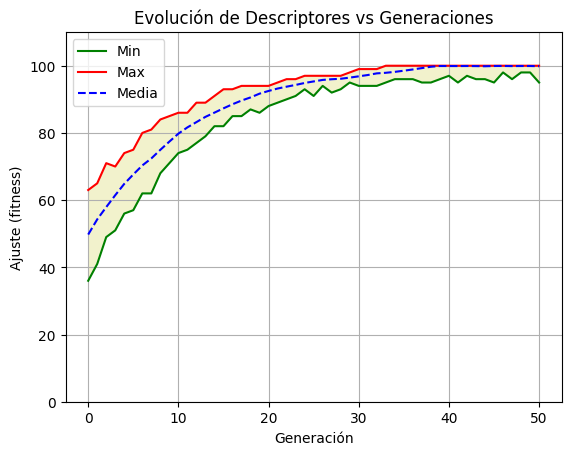

In [104]:
plot_evolucion(log_book)